In [4]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [92]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dataset = pd.read_csv('listings.csv.gz', compression = 'gzip')

# Data Preprocessing
Familiarizing ourselves with the data content would help us do better analysis and modelling. There are 106 columns, but we will try to drop the ones that do not carry useful information for our analysis or modelling process. We will start by scanning through the columns.

In [7]:
dataset.shape

(20677, 106)

In [8]:
# First 20 columns
dataset.iloc[:3 , :20]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",NaN,NaN,https://a0.muscache.com/im/pictures/138431/707...,NaN,56142


Listing Details:
The dataset contain historical and current data about airbnb listings mostly in Amsterdam captured on 9th August, 2019. 

Out of the first 20 columns we shall remove the rest and keep only:

    - id - listing identifier useful for joins and indexing
    - last_scraped - useful for calculating reviews_per_month

In [9]:
sublist_1 = dataset[['id', 'last_scraped']]

In [10]:
# Second 20 columns
dataset.iloc[:3 , 20:40]

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed
0,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt
1,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost
2,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West


From the second 20 columns we shall only keep:

    - host_name - for identification
    - host_since - useful for calculating duration
    - host_location - for location and geospatial analysis
    - host_about - useful information
    - host_is_superhost - descriptor
    - host_has_profile_pic - credibility element
    - host_identity_verified - another credibility element
    - neighbourhood - for geolocation
    - neighbourhood_cleansed - same as above


In [11]:
sublist_2 = dataset[['host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost',
                     'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed']]

In [12]:
# Third 20 columns
dataset.iloc[:3, 40:60]

,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN
1,NaN,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN
2,NaN,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.37297,4.88339,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",NaN


From the next 20 columns we will keep the following:

    - latitude - useful for map visualizations
    - longitude - same as above we will use it later to visualise the data on the map
    - property_type - descriptor
    - room_type - same as above
    - accommodates - same as above
    - bathrooms - same as above
    - bedrooms - same as above
    - beds - same as above
    - bed_type - same as above
    - amenities - due to number of unique features (over 100) we will only concentrate on the total number of amenities

In [13]:
sublist_3 = dataset[['latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities']]

In [14]:
# Fourth 20 columns
dataset.iloc[:3, 60:80]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90
0,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43
1,$80.00,NaN,NaN,NaN,NaN,2,$0.00,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34
2,$125.00,$650.00,"$2,000.00",$300.00,$40.00,2,$10.00,14,60,14,14,60,60,14.0,60.0,today,t,4,6,16


From the next 20 columns we shall keep:

    - price - price per night for numer of guest
    - security_deposit - associated with cost
    - cleaning_fee - additional cost
    - guests_included - number of persons staying
    - extra_people - cost of additional person per night
    - minimum_nights - also cost related

In [15]:
sublist_4 = dataset[['price', 'security_deposit', 'cleaning_fee', 'guests_included', 
                     'extra_people', 'minimum_nights']]

In [16]:
# Fifth 20 columns
dataset.iloc[:3, 80:100]

,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f
1,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f
2,75,2019-08-09,3,2,2018-01-21,2019-05-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f


From the next set of columns we shall keep:
    - first_review - uselful for calculating reviews per month
    - last_review - useful to determine inactive listings
    - number_of_reviews - total number of reviews in entire listing history
    - review_scores_accuracy: numbers between 2 and 10
    - review_scores_cleanliness: numbers between 2 and 10
    - review_scores_checkin: numbers between 2 and 10
    - review_scores_communication: numbers between 2 and 10
    - review_scores_location: numbers between 2 and 10
    - review_scores_value: numbers between 2 and 10
    - instant_bookable: t or false
    - cancellation_policy: ordered
    - require_guest_profile_picture:t or false

In [17]:
sublist_5 = dataset[['first_review', 'last_review', 'number_of_reviews','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 
                     'cancellation_policy', 'require_guest_profile_picture']]

In [18]:
# remaining columns
dataset.iloc[:3,100:]

,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,1,0,1,0,2.12
1,f,2,0,2,0,2.46
2,f,2,2,0,0,0.16


Here, we shall only keep:
    - require_guest_phone_verification: t or false
    - caluculated_host_listings_count: another measure of host's credibility

In [19]:
sublist_6 = dataset[['require_guest_phone_verification', 'calculated_host_listings_count']]

In [20]:
# create a dataframe containing the selected features
listings = pd.concat([sublist_1, sublist_2, sublist_3, sublist_4, sublist_5, sublist_6], axis=1)
listings.head(5)

,id,last_scraped,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2818,2019-08-09,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",t,t,f,Indische Buurt,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1
1,20168,2019-08-09,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,f,t,f,Grachtengordel,...,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2
2,25428,2019-08-09,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",f,t,f,Grachtengordel,...,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2
3,27886,2019-08-09,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",t,t,t,Westelijke Eilanden,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1
4,28871,2019-08-09,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",Hi,t,t,t,Amsterdam Centrum,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,3


In [21]:
listings.shape

(20677, 41)

We have successfully reduced the number of features from 106 to 41. Next, we shall drop all listings without reviews as such listings likely do not have records.

In [22]:
listings = listings[listings['number_of_reviews']>0]
listings.shape

(18084, 41)

This has reduced the number of listings from 20677 to 18084. Now let us fill missing values to enable us do mathematical operations. For cleaning fee and security deposit, we can input 0 and " " for host_about.

In [23]:
# List of columns with null values
listings.columns[listings.isnull().any()]

Index(['host_name', 'host_since', 'host_location', 'host_about',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [24]:
# Fill missing values in selected columns
listings.fillna({'cleaning_fee':0, 'security_deposit':0, 'host_about':" "}, inplace = True)
listings[['cleaning_fee', 'security_deposit', 'host_about']].isnull().sum()

cleaning_fee        0
security_deposit    0
host_about          0
dtype: int64

Now let's drop all rows with missing values

In [25]:
listings.dropna(axis = 0, inplace = True)
listings.shape

(17104, 41)

The size of our data has further reduced to 17104 observation. We can now remove $ from the following variables and convert to float values:
    - price
    - security_deposit
    - cleaning_fee
    - extra_people

In [26]:
# Function to remove characters
def removechar(x):
    # Ensure everything is a str
    x = str(x)
    # remove $
    new = x.replace('$','')
    # remove , and convert to float
    clean = float(new.replace(',',''))
    return clean

In [27]:
# apply the function on the affected columns
listings['price'] = listings['price'].apply(removechar)
listings['security_deposit'] = listings['security_deposit'].apply(removechar)
listings['cleaning_fee'] = listings['cleaning_fee'].apply(removechar)
listings['extra_people'] = listings['extra_people'].apply(removechar)

 # Exploratory Analysis

In [28]:
# import relevant libraries

import matplotlib
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

In [29]:
# group listings based on room_type and rename the id column for clarity

room_type_df = listings.groupby('room_type').id.count().reset_index().rename(columns={'id':'Total_Listings'})
room_type_df

,room_type,Total_Listings
0,Entire home/apt,13648
1,Private room,3392
2,Shared room,64


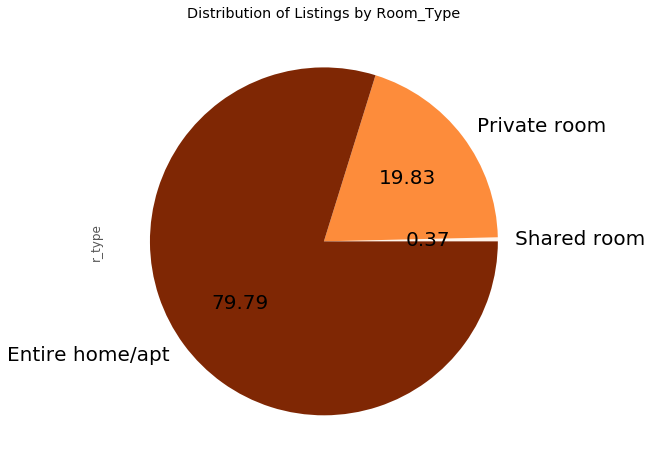

In [30]:
r_type = listings['room_type']
r = Counter(r_type)

r_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
r_df.columns = ['r_type']
r_df.plot.pie(y = 'r_type', colormap = 'Oranges', figsize=(8,8), 
                 fontsize = 20, autopct = '%.2f',legend = False,
                 title = 'Distribution of Listings by Room_Type')

Text(0, 0.5, 'Total Listings')

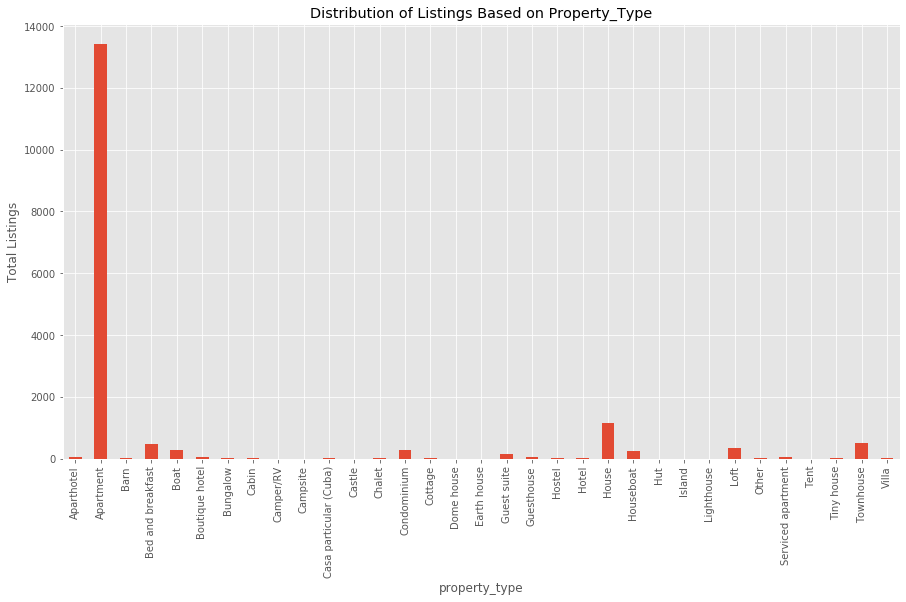

In [31]:
# Analyzing and plotting the number of listings based on their property type
type_of_property = listings.groupby('property_type').id.count().reset_index().rename(columns={'id':'Total_Listings'})

objects = type_of_property['property_type']
y_pos = type_of_property['Total_Listings']
type_of_property.plot(kind='bar', x='property_type',y='Total_Listings',
           figsize =(15,8), legend = False,
           title = 'Distribution of Listings Based on Property_Type')
plt.ylabel('Property Type')
plt.ylabel('Total Listings')

We can see that entire home/apt and apartments are more poplular in the listings.

In [32]:
# Price distribution by room type and property type

type_of_property = listings.groupby(['property_type','room_type']).price.mean().reset_index().sort_values('price', ascending=[0])
type_of_property.head()

,property_type,room_type,price
48,Lighthouse,Entire home/apt,4500.000000
23,Castle,Entire home/apt,550.000000
38,Hostel,Shared room,447.500000
39,Hotel,Private room,364.857143
37,Hostel,Private room,310.000000


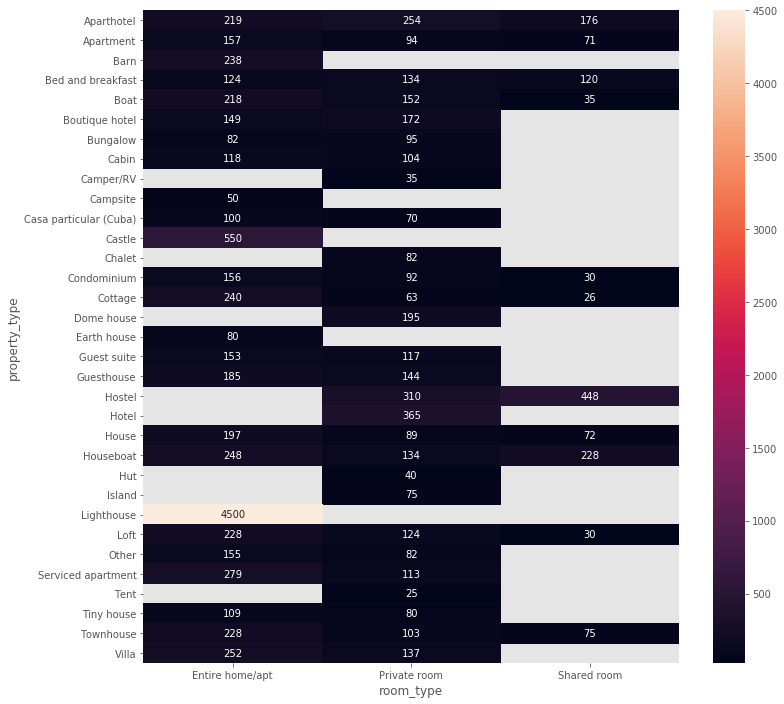

In [33]:
# visual representation using heat map
plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

The figure above shows the price breakdown based on property_type and room types. It can be seen that for different property types,prices for Entire home/apartment are the maximum, indicting that they are key factors in the determination of a listing.

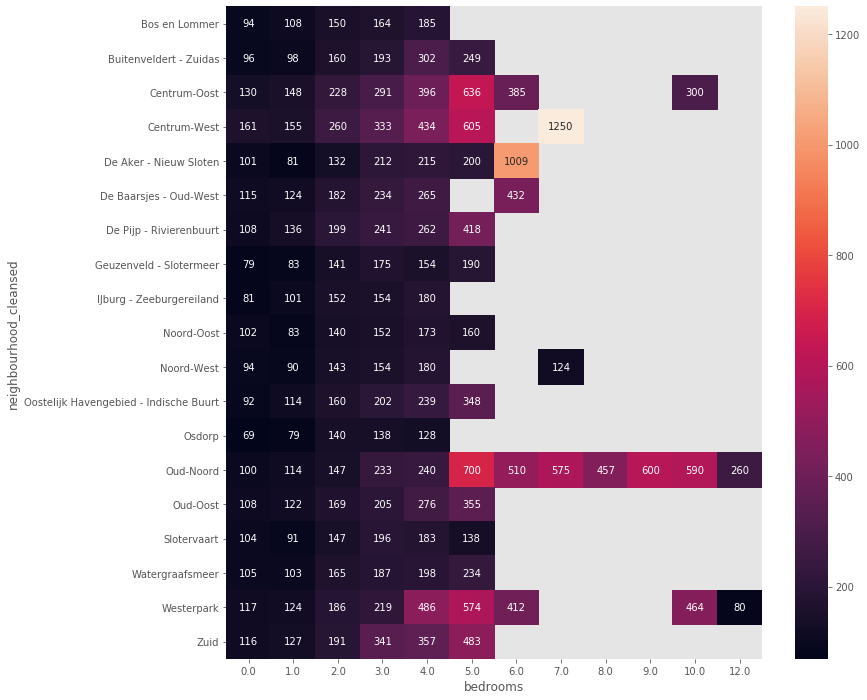

In [34]:
# price variation per number of bedrooms
plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

It can be seen that prices vary with neighbourhood and number of bedrooms. Next we shall calculate the length of listing and duration of time a host has been with airbnb.

In [35]:
#convert date values from str to date format
import datetime as dt
listings['last_review'] = pd.to_datetime(listings['last_review']).dt.date
listings['first_review'] = pd.to_datetime(listings['first_review']).dt.date
listings['host_since'] = pd.to_datetime(listings['host_since']).dt.date

#create new columns for length of time of list and host's membership on airbnb in days.
listings['list_duration'] = (listings['last_review'] - listings['first_review']).dt.days
listings['host_duration'] = (listings['last_review'] - listings['host_since']).dt.days


In [36]:
listings['list_duration'].describe()[['min', 'mean', 'max']]

min        0.000000
mean     628.474333
max     3780.000000
Name: list_duration, dtype: float64

In [37]:
listings['host_duration'].describe()[['min', 'mean', 'max']]

min        3.000000
mean    1370.288704
max     3967.000000
Name: host_duration, dtype: float64

We can see that the average duration for listings is 629 days. That doesn't necessarily mean that the listings have been unoccupied for that durtion of time. We can also see that the least and highest duration of hosts on the platform are greater than those of list_duration, which seem to indicate that most people register as hosts without posting a listing right away.

In [38]:
print("The first host joined on", min(listings.host_since).strftime('%d %B %Y'), "and the last host joined on", max(listings.host_since).strftime('%d %B %Y'))

The first host joined on 24 September 2008 and the last host joined on 30 July 2019


In [44]:
# Top revenue earners
listings['estimated_revenue'] = listings['price'] *listings['minimum_nights']
earnings = listings[['id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False)
earnings.head()

,id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
16709,28651212,10,365,3,1.0,2.0,1095000.0
1779,3145498,15,1001,4,6.0,9.0,314314.0
3184,5950023,17,1001,4,4.0,4.0,260260.0
122,258273,8,30,4,1.0,1.0,240000.0
6394,11830487,5,200,2,1.0,1.0,199800.0


In [46]:
# Check distribution by number of minimum nights
listings[['id','minimum_nights']].groupby(['minimum_nights']).count().sort_values('minimum_nights')

,id
minimum_nights,
1,2373
2,7103
3,4506
4,1454
5,775
6,200
7,353
8,26
9,10


Minimum nights of 999, 1000 and 1001 look extreme in reality. They could be data anomalies.

# Additional Preprocessing
First things first, we must encode the categorical values as follows:
    - host_is_superhost - conversion from t/f to 1/0 values
    - host_has_profile_pic - conversion from t/f to 1/0 values
    - host_identity_verified - conversion from t/f to 1/0 values
    - instant_bookable - conversion from t/f to 1/0 values
    - require_guest_profile_picture - conversion from t/f to 1/0 values
    - require_guest_phone_verification - conversion from t/f to 1/0 values


In [103]:
listings_new = listings.apply(lambda x: x.map({'f':0, 't':1}) 
               if x.name == 'host_is_superhost' 
               or x.name == 'host_has_profile_pic'
               or x.name == 'host_identity_verified'
               or x.name == 'instant_bookable'
               or x.name == 'require_guest_profile_picture'
               or x.name == 'require_guest_phone_verification'
               else x)



We will replace the non-alphanumeric characters for uniformity in:
    - neighbourhood_group_cleansed 
    - property_type 
    - room_type 
    - bed_type 
    - cancellation_policy

In [105]:
#removing non_alphanumeric characters
#"[^[:alnum:]]", "_"
listings_new['neighbourhood_cleansed']=listings['neighbourhood_cleansed'].replace('[^[:alnum:]]', '_')
listings_new['property_type']=listings['property_type'].replace('[^[:alnum:]]', '_')
listings_new['bed_type']=listings['bed_type'].replace('[^[:alnum:]]', '_')
listings_new['cancellation_policy']=listings['cancellation_policy'].replace('[^[:alnum:]]', '_')
listings_new['room_type']=listings['room_type'].replace('[^[:alnum:]]', '_')

In [106]:
#create dummies
listings_new['neighbourhood_cleansed'] = pd.get_dummies(listings['neighbourhood_cleansed'])
listings_new['property_type'] = pd.get_dummies(listings['property_type'])
listings_new['bed_type'] = pd.get_dummies(listings['bed_type'])
listings_new['cancellation_policy'] = pd.get_dummies(listings['cancellation_policy'])
listings_new['room_type'] = pd.get_dummies(listings['room_type'])

In [107]:
# unwanted columns
listings_new.drop(['id', 'host_name', 'last_scraped', 'host_since', 'host_location', 'host_about', 
                   'amenities', 'neighbourhood','' 'longitude', 'latitude', 'first_review', 'last_review'],
                  axis = 1, inplace=True)

In [108]:
listings_new.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'number_of_reviews', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'list_duration', 'host_duration',
       'estimated_revenue'],
      dtype='object')

In [109]:
# correlation
corr_matrix = listings_new.corr()
corr_matrix['price'].sort_values(ascending=False)

price                               1.000000
accommodates                        0.344252
bedrooms                            0.308649
estimated_revenue                   0.291065
cleaning_fee                        0.286026
beds                                0.283862
bathrooms                           0.224317
guests_included                     0.182868
room_type                           0.167084
extra_people                        0.100127
security_deposit                    0.093988
review_scores_location              0.091143
neighbourhood_cleansed              0.059743
cancellation_policy                 0.054991
minimum_nights                      0.040898
host_duration                       0.025056
host_is_superhost                   0.018995
list_duration                       0.017855
require_guest_phone_verification    0.016263
review_scores_checkin               0.012766
review_scores_communication         0.007014
require_guest_profile_picture       0.006607
bed_type  

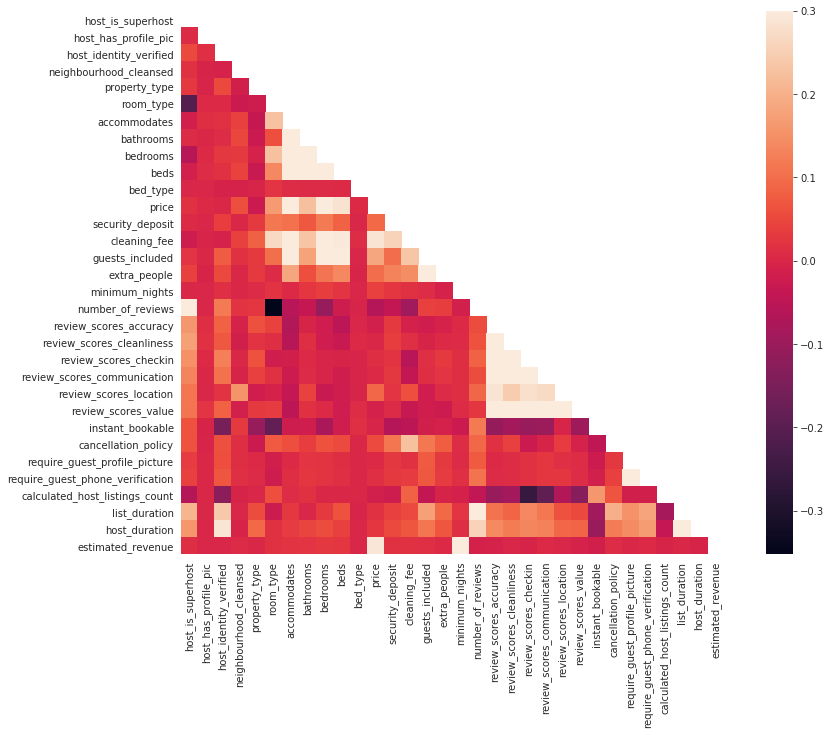

In [110]:
#correlation heatmap
corr = listings_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

# Modelling
One of the most important attributes of a listing is it's price. So, let's try to predict the price of a listing given it's other features.


In [111]:
# modelling
from sklearn.preprocessing import StandardScaler 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

print('all set')

all set


In [114]:
# target split
X = listings_new.drop(['price'], axis = 1)
y = listings_new['price']

In [115]:
# standardize features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [124]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

<b>Linear Regression</b>

In [117]:
# select important feature for Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'estimated_revenue']


In [122]:
X_selected = listings_new[['host_is_superhost', 'neighbourhood_cleansed', 'property_type', 
                              'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                              'cleaning_fee', 'extra_people', 'minimum_nights', 'number_of_reviews', 
                              'review_scores_location', 'review_scores_value', 'instant_bookable',
                              'calculated_host_listings_count', 'estimated_revenue']]

In [125]:
# Splitting for regression with the selected features
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_selected, y, test_size=0.3, random_state=123)

In [126]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
#make prediction
y_pred_lr = regressor.predict(X_test_lr)

In [129]:
print('The R^2 value for Linear Regression is :', round((r2_score(y_test_lr,y_pred_lr)), 3))

The R^2 value for Linear Regression is        : 0.359


In [131]:
print('The Adj R2 value for Linear Regression is :', round((1 - (1-r2_score(y_test_lr,y_pred_lr))*(len(y)-1)/(len(y)-X_selected.shape[1]-1)),3))

The Adj R2 value for Linear Regression is : 0.358


In [132]:
MSE_lr  = mean_squared_error(y_test_lr,y_pred_lr)
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));

The RMSE value for Linear Regression is        : 76.0


Text(0.5, 1.0, 'Linear Regression')

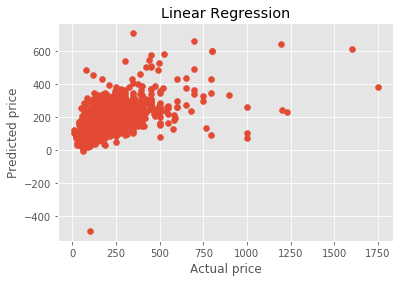

In [133]:
# regression plot
plt.scatter(y_test_lr, y_pred_lr)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression")

In [142]:
# XGboost tuning
tuned_parameters = [{'max_depth': [5,10, 20, 30],'learning_rate':[0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}


In [143]:
# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.01, max_depth=5, n_estimators=150, random_state = 0, silent = True)
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [144]:
y_pred2 = regr.predict(X_test)
print('The R^2 value for XGBoost Regressor is :', round((r2_score(y_test,y_pred2)), 3))

The R^2 value for XGBoost Regressor is : 0.061


In [145]:
print('The Adj R2 value for XGBoost Regressor is :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for XGBoost Regressor is : 0.059


In [146]:
MSE_xgb = mean_squared_error(y_test,y_pred2)
print('The RMSE value for XGBoost Regressor is :', round(np.sqrt(MSE_xgb)));

The RMSE value for XGBoost Regressor is : 92.0


Text(0.5, 1.0, 'Xgboost')

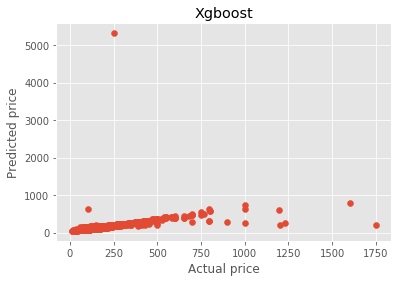

In [147]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

In [134]:
# Random Forests tuning
tuned_parameters = [{'max_depth': [5,10, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

The best hyper-parameters for Random Forests are:  {'max_depth': 70, 'n_estimators': 100}


In [137]:
# Random Forests using the tuned features
regr_rf = RandomForestRegressor(max_depth=70, random_state=0,
                             n_estimators=100)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [138]:
y_pred5 = regr_rf.predict(X_test)
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred5)), 3))

The R^2 value for Random Forests Regressor is : 0.916


In [139]:
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Random Forests Regressor is : 0.916


In [140]:
MSE_rf  = mean_squared_error(y_test,y_pred5)
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for Random Forests Regressor is : 27.0


Text(0.5, 1.0, 'Random Forest')

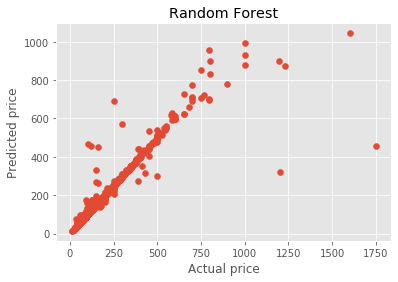

In [141]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Random Forest")

We can see from the results above that Tuned Random Forest Regressor is the best fit model amongst the three compared here. It produced the highest R squared value and the lowest RMSE while XGBoost appear to be the least fit model with reverse scores.
There are many other options that can be explored like GBM etc.